## Music and Mental Health

### Libraries, general overview of dataset, and cleanup

In [3]:
# Import the # Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick
from yellowbrick.features import Rank2D
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate
from sklearn.model_selection import train_test_split

In [28]:
# Import the csv file 
music = pd.read_csv('/Users/MadamPresident/Desktop/Fall 2023/Project 2/music and mental health.csv')

# Check the header
music.head(5) 

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav_genre,Exploratory,Foreign languages,...,R_&_B,Rap,Rock,Video_game,Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand
1,8/27/2022 19:57,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video_game,No,Yes,...,Never,Rarely,Rarely,Frequently,7.0,7.0,10.0,2.0,NaN,I understand
3,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand
4,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,RandB,Yes,No,...,Frequently,Frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand


In [29]:
# Look at the statisitics to gain additional insights into the data
print('Describe the Data')
print(music.describe())

print(' ')

print('Summarize the Data')
print(music.describe(exclude = 'number').T)


Describe the Data
              Age  Hours per day           BPM     Anxiety  Depression   
count  735.000000     736.000000  6.290000e+02  736.000000  736.000000  \
mean    25.206803       3.572758  1.589948e+06    5.837636    4.796196   
std     12.054970       3.028199  3.987261e+07    2.793054    3.028870   
min     10.000000       0.000000  0.000000e+00    0.000000    0.000000   
25%     18.000000       2.000000  1.000000e+02    4.000000    2.000000   
50%     21.000000       3.000000  1.200000e+02    6.000000    5.000000   
75%     28.000000       5.000000  1.440000e+02    8.000000    7.000000   
max     89.000000      24.000000  1.000000e+09   10.000000   10.000000   

         Insomnia         OCD  
count  736.000000  736.000000  
mean     3.738451    2.637228  
std      3.088689    2.842017  
min      0.000000    0.000000  
25%      1.000000    0.000000  
50%      3.000000    2.000000  
75%      6.000000    5.000000  
max     10.000000   10.000000  
 
Summarize the Data
      

In [30]:
# Remove the columns I don't need
# Timestamp and Permissions don't add anything to the data
music.drop(['Timestamp', 'Permissions'], axis = 1, inplace = True)

# Look at new dataframe
print('New Data Summary')
print(music.describe(exclude = 'number').T)

New Data Summary
                          count unique         top freq
Primary streaming service   664      5     Spotify  458
While working               733      2         Yes  579
Instrumentalist             732      2          No  497
Composer                    735      2          No  609
Fav_genre                   736     16        Rock  188
Exploratory                 736      2         Yes  525
Foreign languages           732      2         Yes  404
Classical                   736      4      Rarely  259
Country                     736      4       Never  343
EDM                         736      4       Never  307
Folk                        736      4       Never  292
Gospel                      736      4       Never  535
Hip_hop                     736      4   Sometimes  218
Jazz                        736      4       Never  261
K_pop                       736      4       Never  416
Latin                       736      4       Never  443
Lofi                        736

### Distributions and additional cleanup

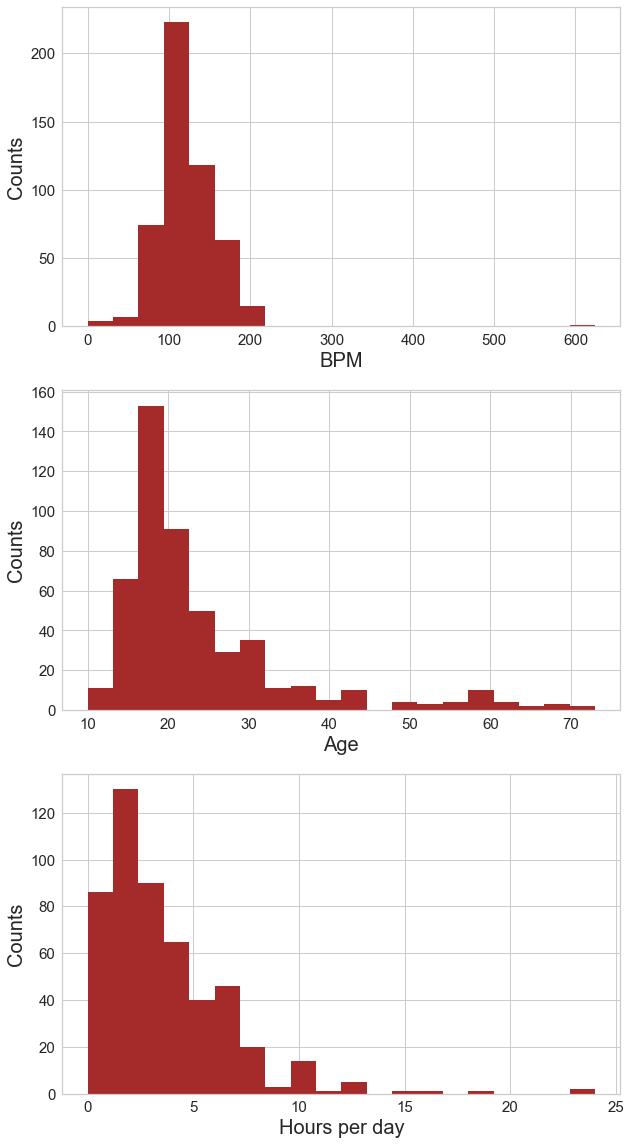

In [52]:
# What is the distribution of Age, BPM, and listening hours
# Histograms
plt.rcParams['figure.figsize'] = (10, 20)

# Make the subplots
fig, axes = plt.subplots(nrows = 3, ncols = 1)

# Specify the features of interest
num_features = ['BPM','Age','Hours per day']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts']

# Draw the histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(music[num_features[idx]].dropna(), 
            bins = 20,
           color = 'brown')
    ax.set_xlabel(xaxes[idx], 
                  fontsize = 20)
    ax.set_ylabel(yaxes[idx], 
                  fontsize = 20)
    ax.tick_params(axis = 'both', 
                   labelsize = 15)
plt.show()

In [62]:
# Start removing outliers
# Remove the BPM over 200
beats = music[music['BPM'] > 200].index
music = music.drop(beats, axis = 0)

In [63]:
# Remove the BPM over 200
beats = music[music['BPM'] < 50].index
music = music.drop(beats, axis = 0)

In [65]:
# Remove listening hours greater then 12
hours = music[music['Hours per day'] > 12].index
music = music.drop(hours, axis = 0)

In [66]:
# It would be tempting at this point to remove older indivuals as well, 
# but I think there is some isnghts to be gained from older people and listening habits/mental health

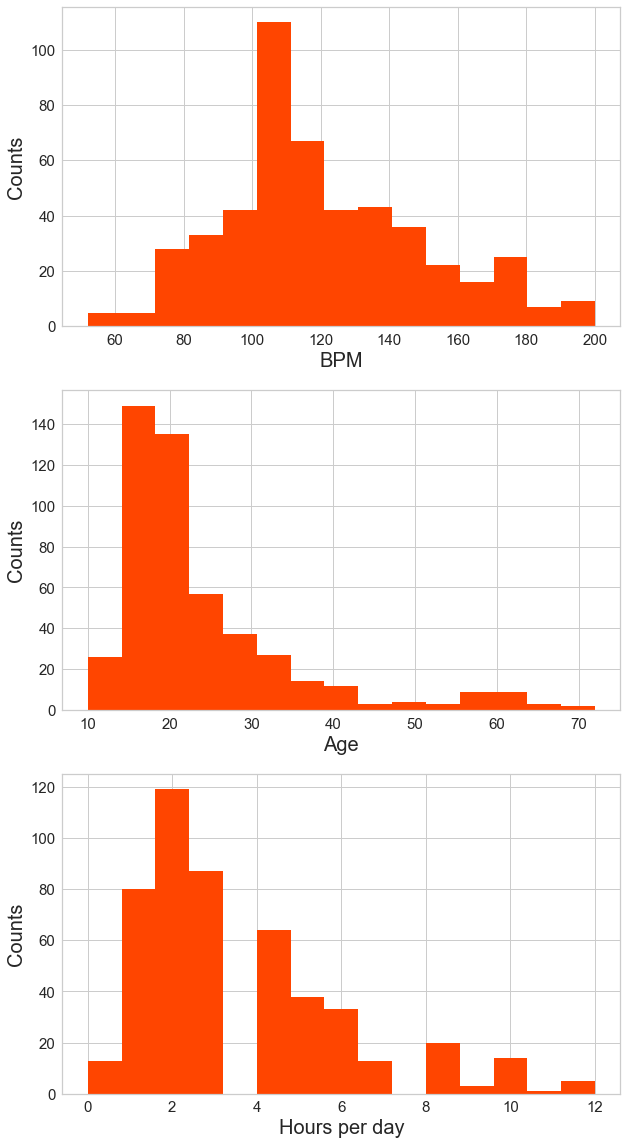

In [67]:
# New distributions for Age, BPM, and listening hours
# Histograms
plt.rcParams['figure.figsize'] = (10, 20)

# Make the subplots
fig, axes = plt.subplots(nrows = 3, ncols = 1)

# Specify the features of interest
num_features = ['BPM','Age','Hours per day']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts']

# Draw the histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(music[num_features[idx]].dropna(), 
            bins = 15,
           color = 'orangered')
    ax.set_xlabel(xaxes[idx], 
                  fontsize = 20)
    ax.set_ylabel(yaxes[idx], 
                  fontsize = 20)
    ax.tick_params(axis = 'both', 
                   labelsize = 15)
plt.show()

In [119]:
print('Favorite Genre, All')
print(music['Fav_genre'].value_counts())
print(' ')
print('Favorite Genre, Top 5')
print(music_top['Fav_genre'].value_counts())

Favorite Genre, All
Fav_genre
Rock          120
Pop            81
Metal          56
Hip hop        29
Classical      29
EDM            26
RandB          23
Video_game     22
Folk           22
Country        18
K_pop          17
Rap            17
Jazz           15
Lofi           10
Gospel          4
Latin           1
Name: count, dtype: int64
 
Favorite Genre, Top 5
Fav_genre
Rock         120
Pop           81
Metal         56
Hip hop       29
Classical     29
Name: count, dtype: int64


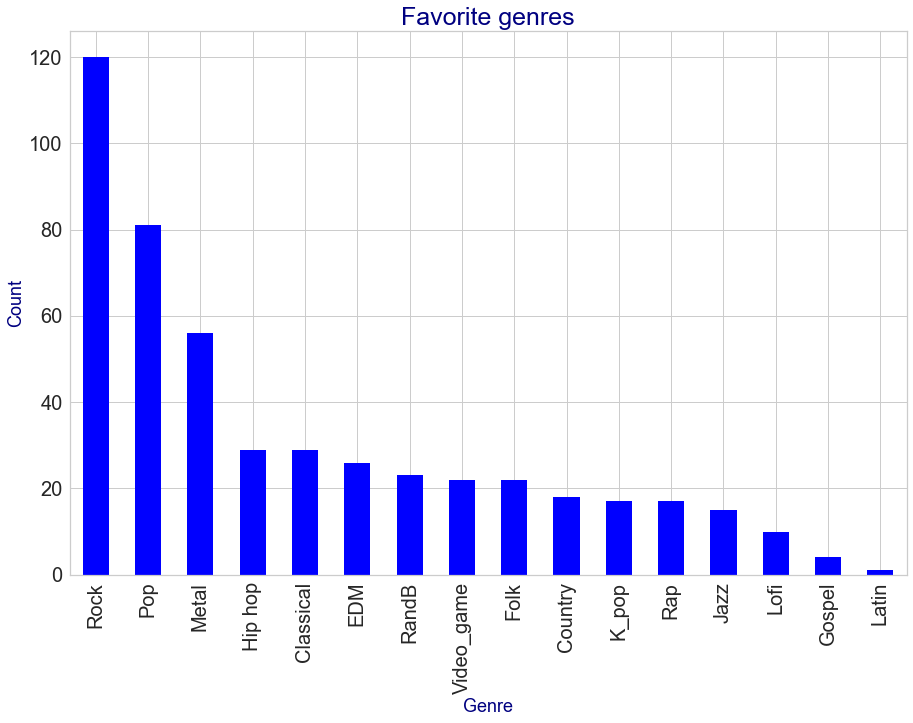

In [77]:
# Favorite Genre counts
# See counts for each genre
wx = music['Fav_genre'].value_counts().plot(kind = 'bar', 
                                                 fontsize = 20, 
                                                 figsize = (15, 10), 
                                                 color = 'blue')
wx.set_title('Favorite genres', 
             fontsize = 25,
             color  = 'navy')
wx.set_xlabel('Genre', 
              fontsize = 18,
              color  = 'navy')
wx.set_ylabel('Count', 
              fontsize = 18,
              color  = 'navy');
plt.show()

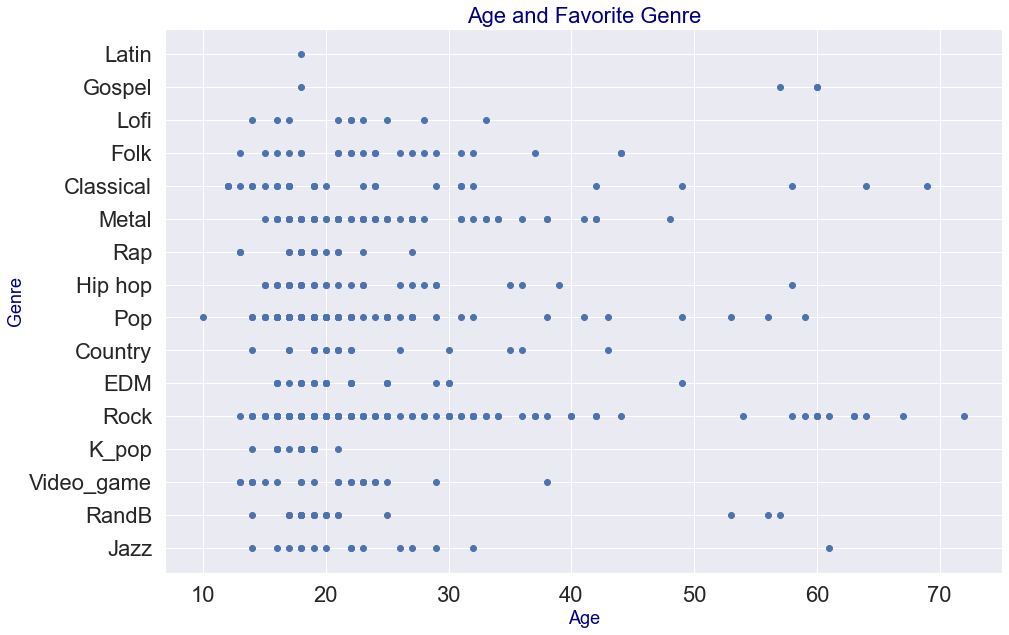

In [114]:
# Sometimes this looks better with a scatterplot and outlies are easier to see
plt.figure(figsize = (15, 10))
plt.scatter(music['Age'], music['Fav_genre'])
plt.xlabel('Age',
          fontsize = 18,
              color  = 'navy')
plt.ylabel('Genre',
          fontsize = 18,
              color  = 'navy')
plt.title('Age and Favorite Genre', 
          size = 22,
         color = 'navy')
plt.show()

In [117]:
# New dataframe based on top 5 genes
music_top = music.loc[music['Fav_genre'].isin(['Rock', 'Pop', 'Metal', 'Hip hop', 'Classical'])]


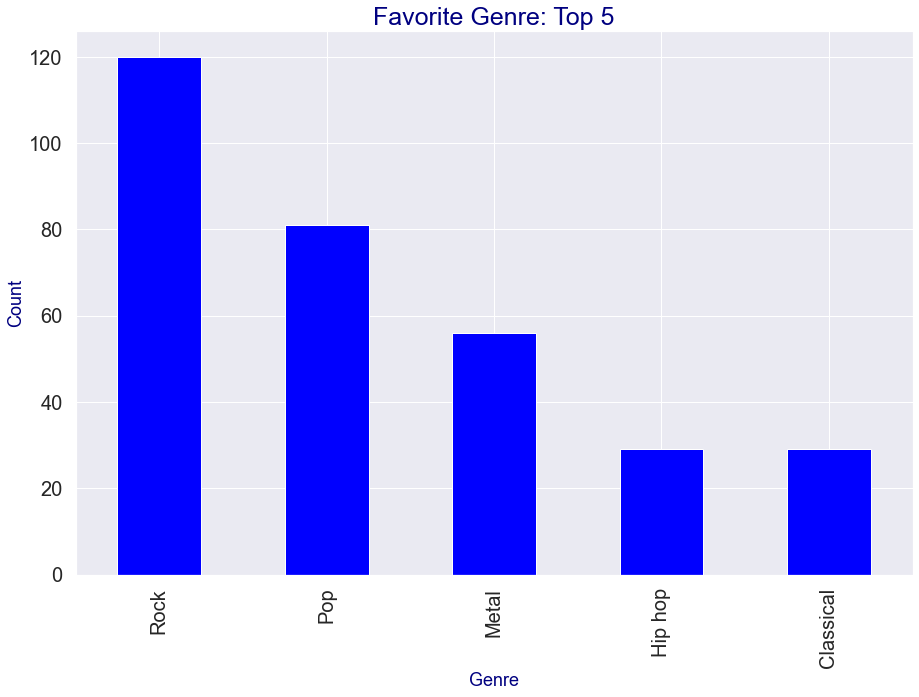

In [122]:
# Favorite Genre counts
# See counts for each genre
wx = music_top['Fav_genre'].value_counts().plot(kind = 'bar', 
                                                 fontsize = 20, 
                                                 figsize = (15, 10), 
                                                 color = 'blue')
wx.set_title('Favorite Genre: Top 5', 
             fontsize = 25,
             color  = 'navy')
wx.set_xlabel('Genre', 
              fontsize = 18,
              color  = 'navy')
wx.set_ylabel('Count', 
              fontsize = 18,
              color  = 'navy');
plt.show()

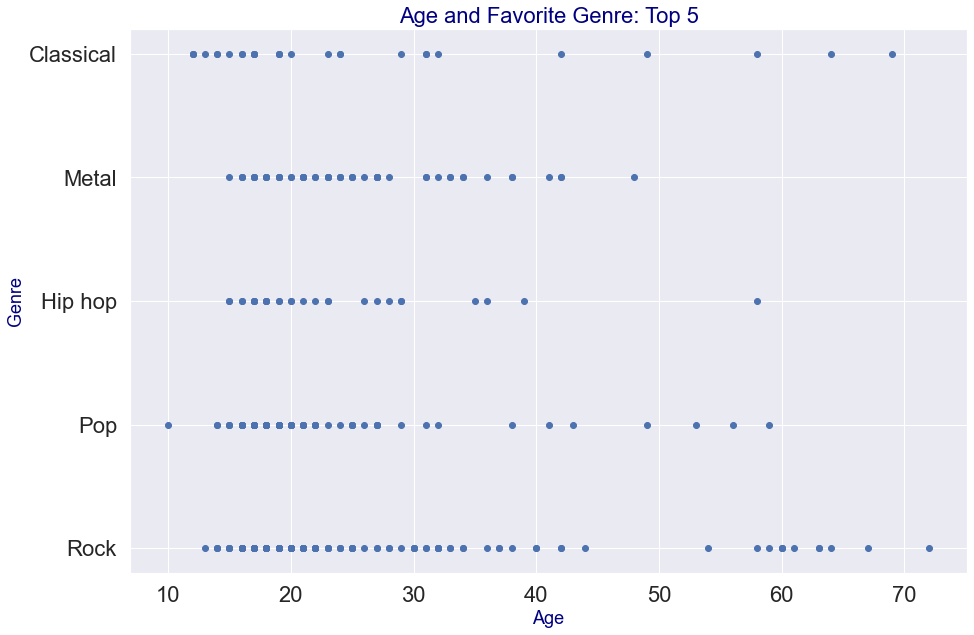

In [121]:
# Sometimes this looks better with a scatterplot and outlies are easier to see
plt.figure(figsize = (15, 10))
plt.scatter(music_top['Age'], music_top['Fav_genre'])
plt.xlabel('Age',
          fontsize = 18,
              color  = 'navy')
plt.ylabel('Genre',
          fontsize = 18,
              color  = 'navy')
plt.title('Age and Favorite Genre: Top 5', 
          size = 22,
         color = 'navy')
plt.show()

# 

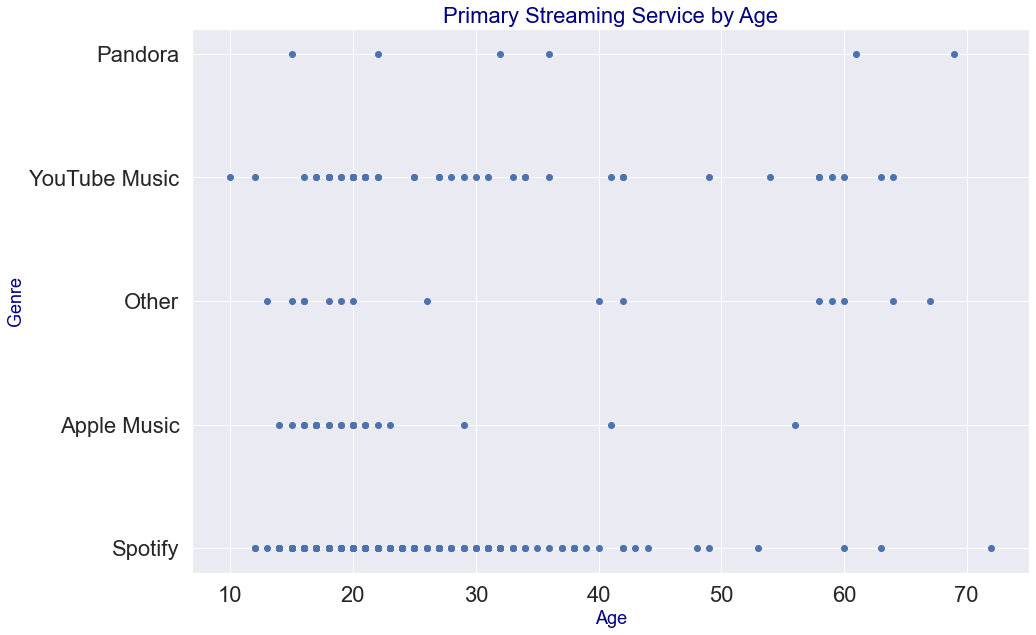

In [229]:
# Distribution of streaming service by age
plt.figure(figsize = (15, 10))
plt.scatter(music_top['Age'], music_top['Primary streaming service'])
plt.xlabel('Age',
          fontsize = 18,
              color  = 'navy')
plt.ylabel('Genre',
          fontsize = 18,
              color  = 'navy')
plt.title('Primary Streaming Service by Age', 
          size = 22,
         color = 'navy')
plt.show()

### Relationships and groupings

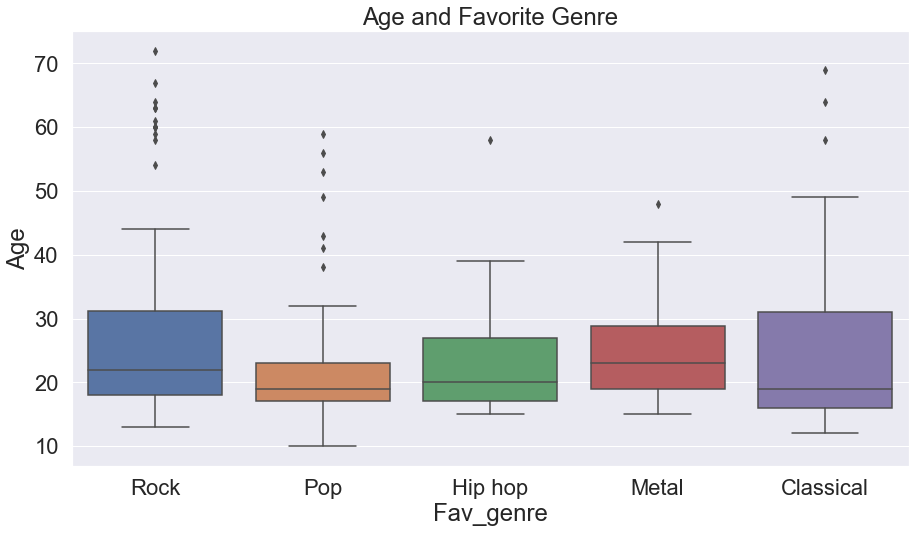

In [120]:
# what is the distributions of age and favorit genre

# figure size
fig, ax = plt.subplots(figsize = (15, 8))

sns.boxplot( x = music_top['Fav_genre'], 
            y = music_top['Age']).set(title = 'Age and Favorite Genre')
sns.set(font_scale =  2)

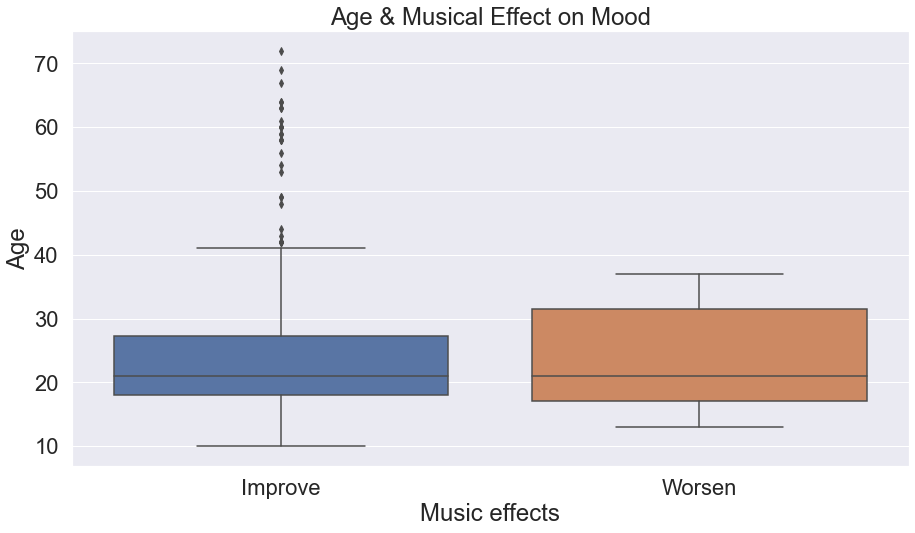

In [149]:
# what is the distributions of age ant effect of their favorite genre and their mood

# figure size
fig, ax = plt.subplots(figsize = (15, 8))

sns.boxplot( x = music_top['Music effects'], 
            y = music_top['Age']).set(title = 'Age & Musical Effect on Mood')
sns.set(font_scale =  2)

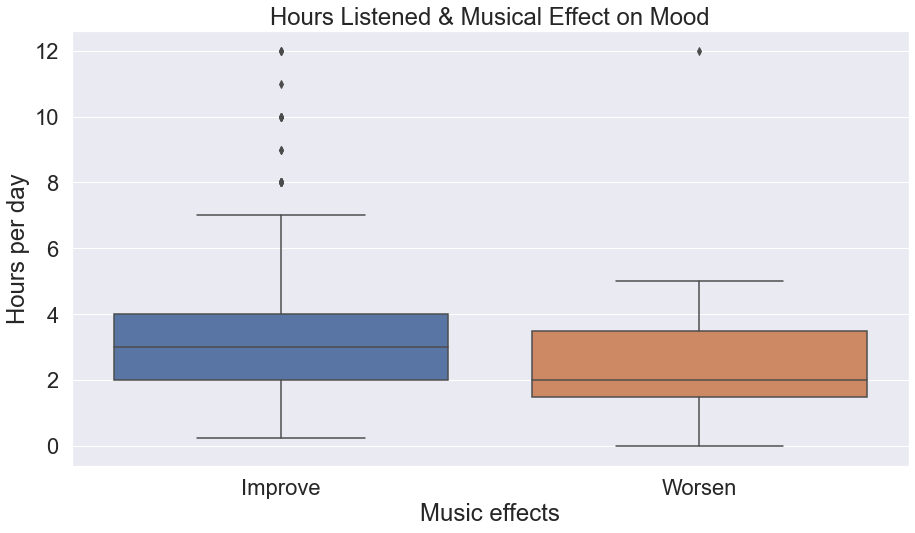

In [327]:
# what is the distributions of hours listened affect their mood

# figure size
fig, ax = plt.subplots(figsize = (15, 8))

sns.boxplot( x = music_top['Music effects'], 
            y = music_top['Hours per day']).set(title = 'Hours Listened & Musical Effect on Mood')
sns.set(font_scale =  2)

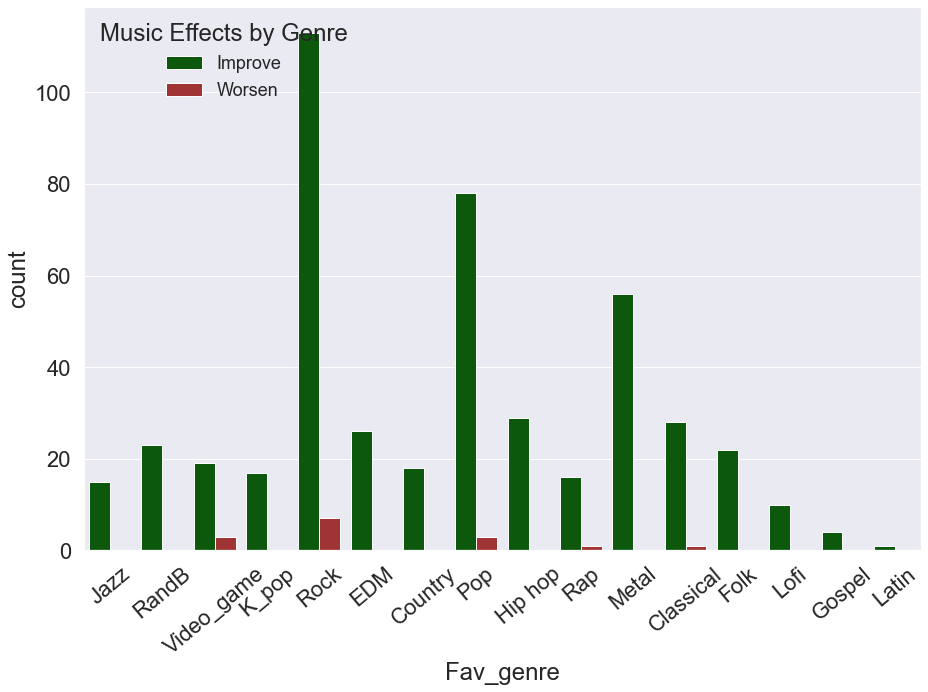

"\nage_means.plot(kind = 'bar', \n               figsize = (15, 10),\n               fontsize = 18,\n              color = colors)\nplt.xlabel('Age Group',\n          fontsize = 22,\n           color  = 'darkslategrey')\nplt.ylabel('Mean Score',\n          fontsize = 22,\n           color  = 'darkslategrey')\nplt.title('Age and Disrder Mean Scores',\n         color = 'darkslategrey')\nplt.legend(fontsize = 15)\nplt.show()\n"

In [161]:
# What are the effects of favorite genre and mood

color_effect = ['darkgreen','firebrick','royalblue']

plt.figure(figsize = (15, 10))
sns.countplot(x = 'Fav_genre', 
              hue = 'Music effects', 
              data = music, 
              palette = color_effect)
plt.legend(title = 'Music Effects by Genre',
          fontsize = 18)
plt.xticks(rotation = 40)
plt.show()



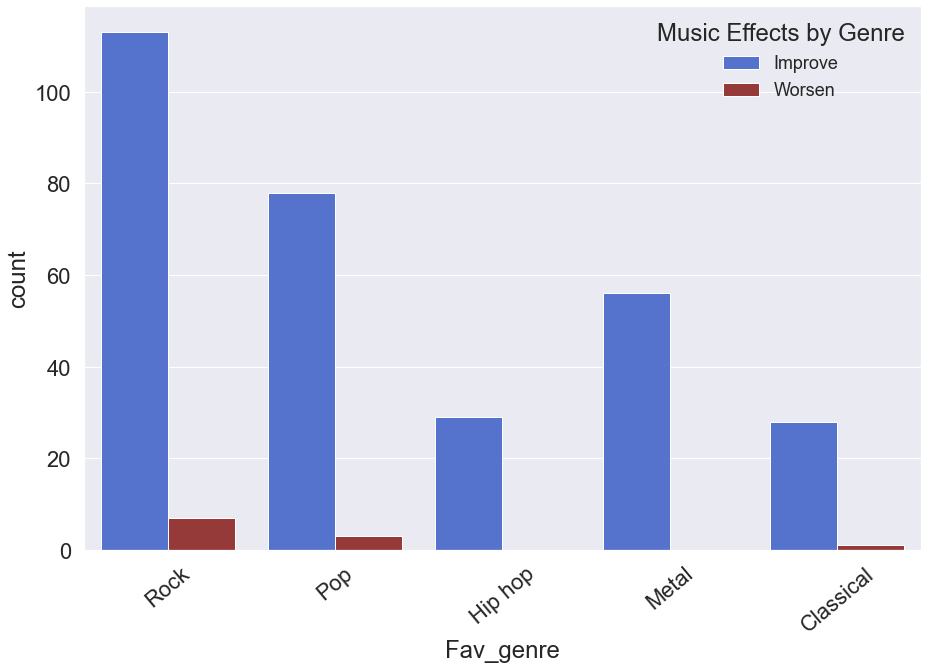

In [164]:
# What are the effects of favorite genre and mood for the top 5 genres

color_effect = ['royalblue','brown','green']

plt.figure(figsize = (15, 10))
sns.countplot(x = 'Fav_genre', 
              hue = 'Music effects', 
              data = music_top, 
              palette = color_effect)
plt.legend(title = 'Music Effects by Genre',
          fontsize = 18)
plt.xticks(rotation = 40)
plt.show()

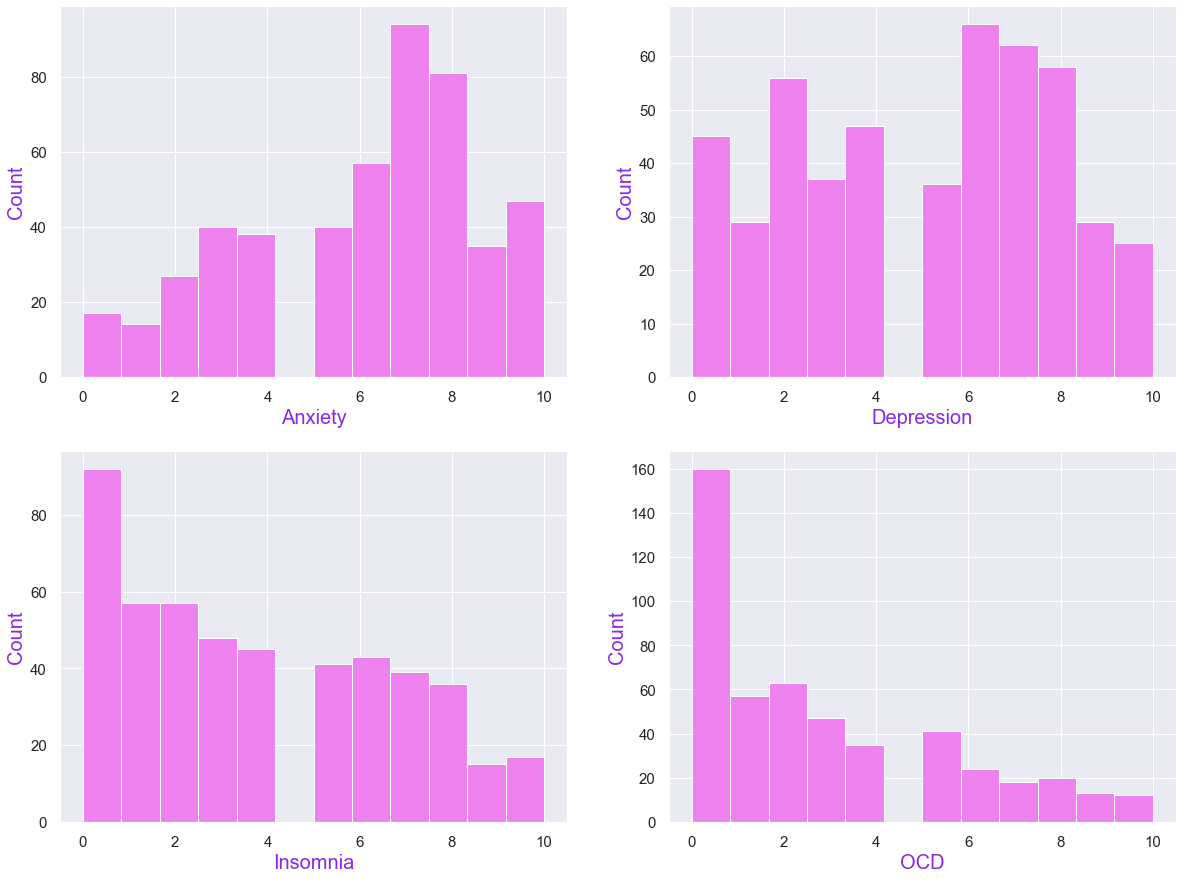

In [103]:
# What are the distributions for the mental disorders: ansiety, depression, insomnia and OCD
# Histograms
plt.rcParams['figure.figsize'] = (20, 15)

# Make the subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Anxiety','Depression','Insomnia', 'OCD']
xaxes = num_features
yaxes = ['Count', 'Count', 'Count', 'Count']

# Draw the histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(music[num_features[idx]].dropna(), 
            bins = 12,
           color = 'violet')
    ax.set_xlabel(xaxes[idx], 
                  fontsize = 20,
                 color = 'blueviolet')
    ax.set_ylabel(yaxes[idx], 
                  fontsize = 20,
                 color = 'blueviolet')
    ax.tick_params(axis = 'both', 
                   labelsize = 15)
plt.show()

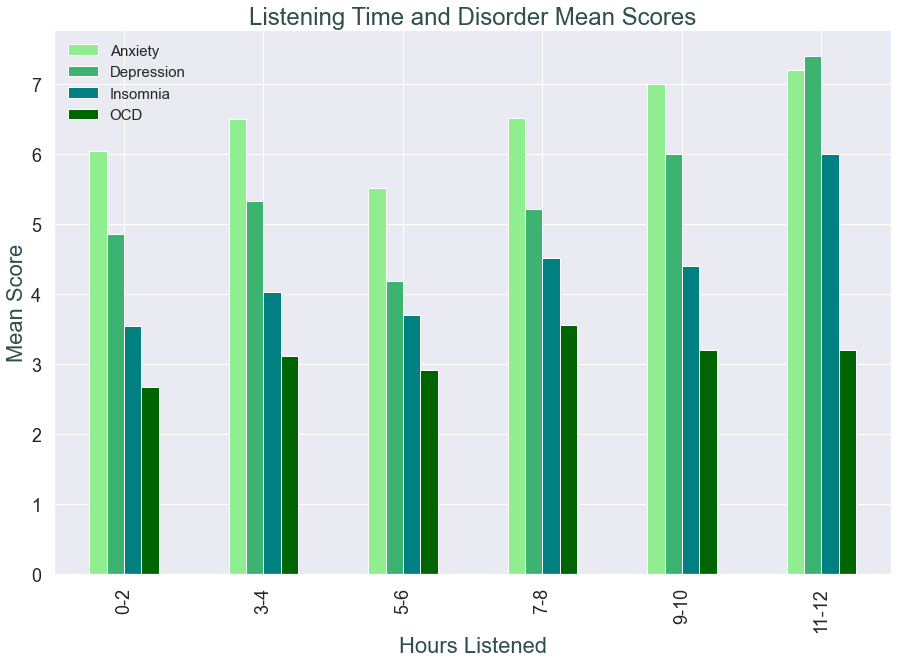

In [238]:
# What is the listening time for each disorder

# Create the listening time groups 
listen_grp = [2, 4, 6, 8, 10, 12, 14]
listen_labels = ['0-2', '3-4', '5-6', '7-8', '9-10', '11-12']
colors = ['lightgreen','mediumseagreen','teal','darkgreen']

# Get the means for the listening groupe and disorders
age_means = music.groupby(pd.cut(music['Hours per day'], 
                                     bins = listen_grp, 
                                     labels = listen_labels, 
                                     right = False))[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean()

age_means.plot(kind = 'bar', 
               figsize = (15, 10),
               fontsize = 18,
              color = colors)
plt.xlabel('Hours Listened',
          fontsize = 22,
           color  = 'darkslategrey')
plt.ylabel('Mean Score',
          fontsize = 22,
           color  = 'darkslategrey')
plt.title('Listening Time and Disorder Mean Scores',
         color = 'darkslategrey')
plt.legend(fontsize = 15)
plt.show()


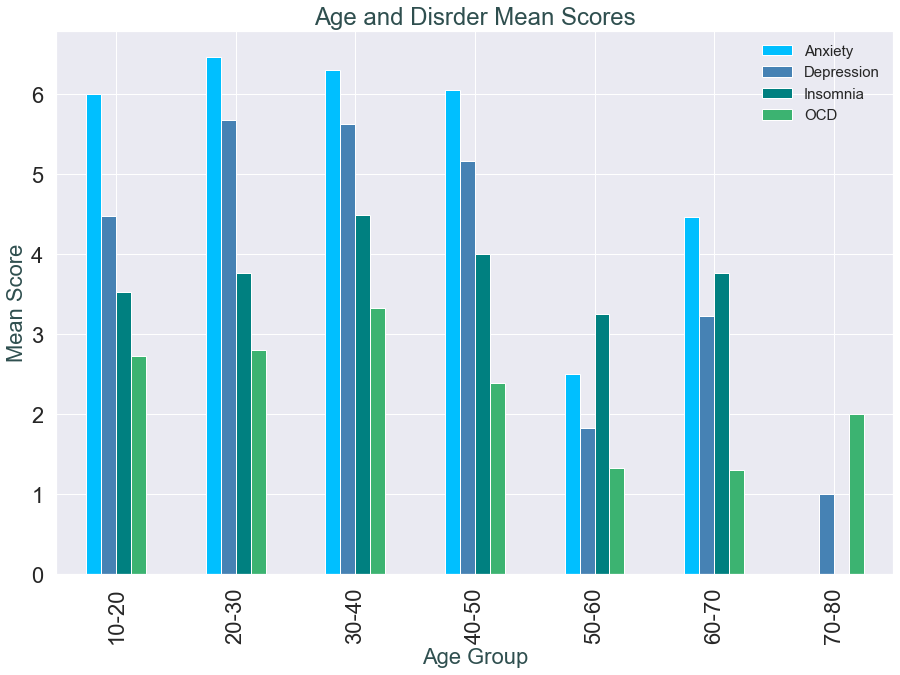

In [239]:
# What is the age groups for each disorder

# Create the age groups by decade
age_group = [10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
colors = ['deepskyblue','steelblue','teal','mediumseagreen']
# Get the means for the age groups and disorders
age_means = music.groupby(pd.cut(music['Age'], 
                                     bins = age_group, 
                                     labels = age_labels, 
                                     right = False))[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean()

age_means.plot(kind = 'bar', 
               figsize = (15, 10),
               fontsize = 22,
              color = colors)
plt.xlabel('Age Group',
          fontsize = 22,
           color  = 'darkslategrey')
plt.ylabel('Mean Score',
          fontsize = 22,
           color  = 'darkslategrey')
plt.title('Age and Disrder Mean Scores',
         color = 'darkslategrey')
plt.legend(fontsize = 15)
plt.show()


### Correlations

In [166]:
# Set up the number features to look for correlations
num_features3 = ['Hours per day', 'Age', 'BPM','Anxiety', 'Depression', 'OCD', 'Insomnia']

array([[  2.5,  61. ,  84. , ...,   7. ,   3. ,   3. ],
       [  4. ,  18. , 107. , ...,   2. ,   9. ,   5. ],
       [  5. ,  18. ,  86. , ...,   8. ,   7. ,   7. ],
       ...,
       [  6. ,  19. , 120. , ...,   2. ,   2. ,   2. ],
       [  5. ,  19. , 170. , ...,   3. ,   1. ,   2. ],
       [  2. ,  29. ,  98. , ...,   2. ,   5. ,   2. ]])

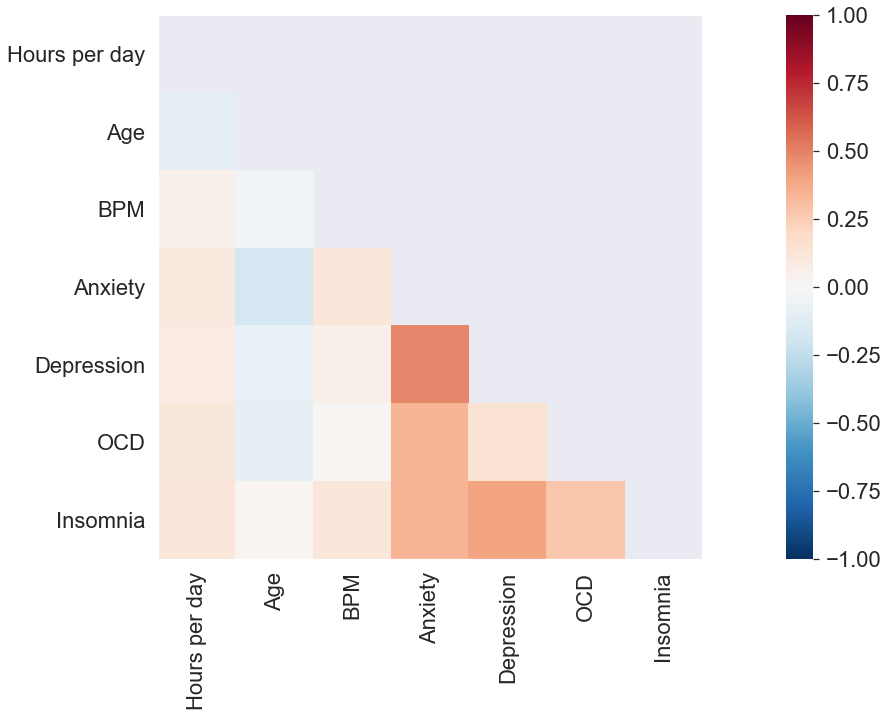

In [168]:
# What are the correlations?
# Correlations
# Set up the figure size
plt.rcParams['figure.figsize'] = (30, 10)

# extract the numpy arrays from the data frame
X = music[num_features3].to_numpy()

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features = num_features3, 
                    algorithm = 'pearson')

# Fit the data to the visualizer
visualizer.fit(X)                

# Transform the data
visualizer.transform(X)  




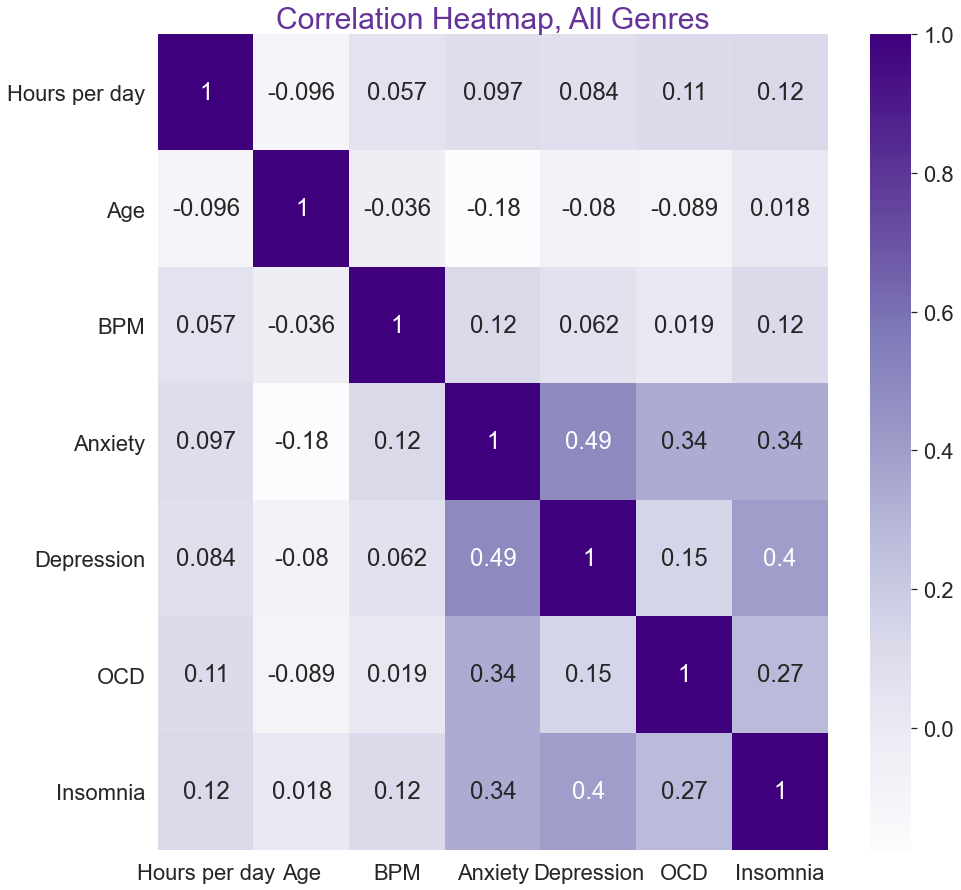

In [196]:
# Look at it on a heatmap

# Set up the columns to look at in the heatmap
music_corr = music[['Hours per day', 'Age', 'BPM','Anxiety', 'Depression', 'OCD', 'Insomnia']]

#i used a heatmap for visualization
plt.figure(figsize = (15, 15))
sns.heatmap(music_corr.corr(), 
            cmap = 'Purples',
            annot = True)
plt.title('Correlation Heatmap, All Genres',
          fontsize = 30,
         color = 'rebeccapurple')
plt.show()

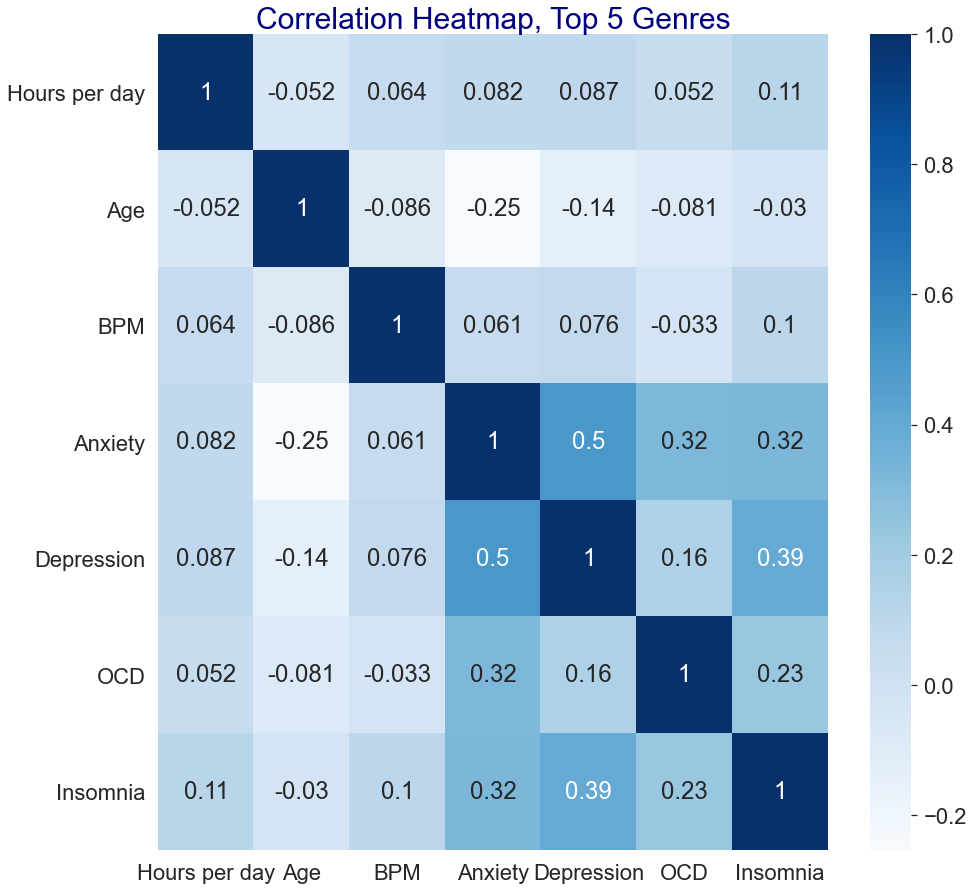

In [193]:
# Does this change with the top 5 genres?
# Look at it on a heatmap

# Set up the columns to look at in the heatmap
music_corr_top = music_top[['Hours per day', 'Age', 'BPM','Anxiety', 'Depression', 'OCD', 'Insomnia']]

#i used a heatmap for visualization
plt.figure(figsize = (15, 15))
sns.heatmap(music_corr_top.corr(), 
            cmap = 'Blues',
            annot = True)
plt.title('Correlation Heatmap, Top 5 Genres',
          fontsize = 30,
         color = 'navy')
plt.show()

### Reccomendation music genre to improve mental health

In [216]:
# Look at how being a misian affects metnal helth scores
musician = music[music['Instrumentalist'] == 'Yes'][['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean()
nonmusician = music[music['Instrumentalist'] == 'No'][['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean()

print('Musician Mental Health Means')
print(musician.head())
print('')
print('Non-Musician Mental Health Means')
print(nonmusician.head())

Musician Mental Health Means
Anxiety       6.247059
Depression    5.038235
Insomnia      3.726471
OCD           2.791176
dtype: float64

Non-Musician Mental Health Means
Anxiety       5.970313
Depression    4.898438
Insomnia      3.718750
OCD           2.692188
dtype: float64


In [214]:
# Do the same for composers
# Look at how being a misian affects metnal helth scores
compose = music[music['Composer'] == 'Yes'][['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean()
noncompose = music[music['Composer'] == 'No'][['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean()

print('Composer Mental Health Means')
print(compose.head())
print('')
print('Non-Composer Mental Health Means')
print(noncompose.head())

Composer Mental Health Means
Anxiety       6.108696
Depression    5.260870
Insomnia      4.478261
OCD           2.750000
dtype: float64

Non-Composer Mental Health Means
Anxiety       6.056533
Depression    4.874372
Insomnia      3.546482
OCD           2.721106
dtype: float64


In [217]:
# Mental disorder by genre
# Set top Genre's
rock = music[music['Fav_genre'] == 'Rock'][['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean()
metal = music[music['Fav_genre'] == 'Metal'][['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean()
pop = music[music['Fav_genre'] == 'Pop'][['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean()
hiphop = music[music['Fav_genre'] == 'Hip hop'][['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean()
classical = music[music['Fav_genre'] == 'Classical'][['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean()

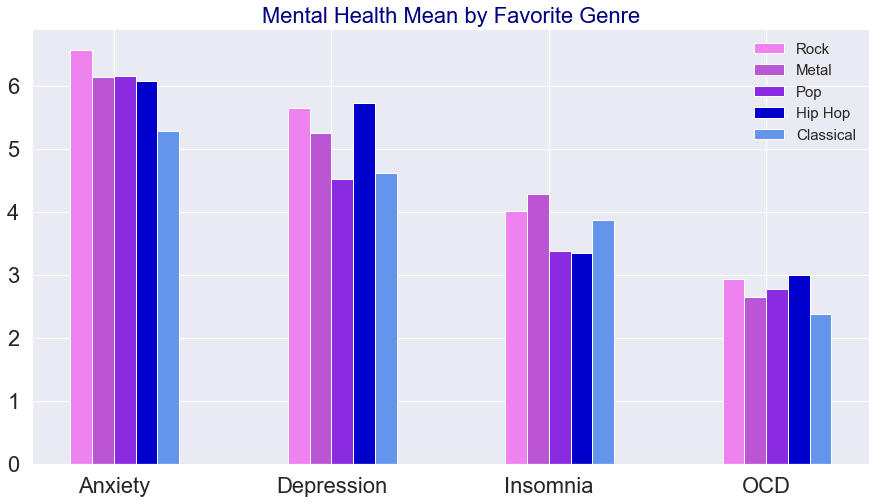

In [228]:
# Favortie genres according to mental health disorders
plt.figure(figsize = (15, 8))
width = 0.1
x = range(len(rock))

plt.bar(x, rock, width, label = 'Rock', color = 'violet')
plt.bar([i + width for i in x], metal, width, label = 'Metal', color = 'mediumorchid')
plt.bar([i + 2 * width for i in x], pop, width, label = 'Pop', color = 'blueviolet')
plt.bar([i + 3 * width for i in x], hiphop, width, label = 'Hip Hop', color = 'mediumblue')
plt.bar([i + 4 * width for i in x], classical, width, label = 'Classical', color = 'cornflowerblue')

plt.xticks([i + 1.5 * width for i in x], ['Anxiety', 'Depression', 'Insomnia', 'OCD'])
plt.legend(fontsize = 15)
plt.title('Mental Health Mean by Favorite Genre',
         fontsize = 22,
         color = 'navy')
plt.show()

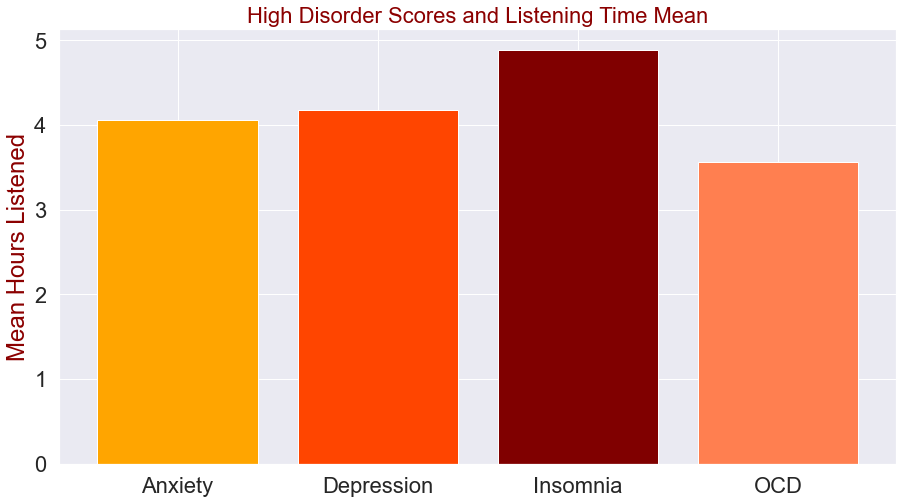

In [269]:
# Hours listened by high and low disorders
# How do the hourse listened change according to mental health disorder
# High disroder score means
high_anxiety = music[music['Anxiety'] > 8]['Hours per day'].mean()
high_depress = music[music['Depression'] > 8]['Hours per day'].mean()
high_insom = music[music['Insomnia'] > 8]['Hours per day'].mean()
high_ocd = music[music['OCD'] > 8]['Hours per day'].mean()

disorders = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
mean_hour = [high_anxiety, high_depress, high_insom, high_ocd]

plt.figure(figsize = (15, 8))
width = 0.1

plt.bar(disorders, mean_hour, color = ['orange','orangered','maroon','coral'])
plt.ylabel('Mean Hours Listened',
          color = 'darkred')

plt.title('High Disorder Scores and Listening Time Mean',
         fontsize = 22,
         color = 'darkred')

plt.show()

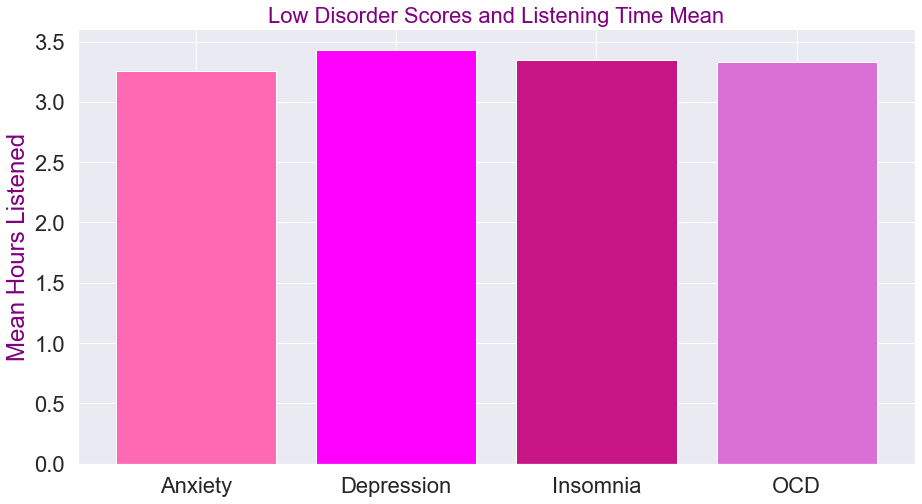

In [272]:
# Hours listened by high and low disorders
# Low disorder mean scores
low_anxiety = music[music['Anxiety'] <= 3]['Hours per day'].mean()
low_depress = music[music['Depression'] <= 3]['Hours per day'].mean()
low_insom = music[music['Insomnia'] <= 3]['Hours per day'].mean()
low_ocd = music[music['OCD'] <= 3]['Hours per day'].mean()

disorders = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
mean_hour = [low_anxiety, low_depress, low_insom, low_ocd]

plt.figure(figsize = (15, 8))
width = 0.1

plt.bar(disorders, mean_hour, color = ['hotpink','magenta','mediumvioletred','orchid'])
plt.ylabel('Mean Hours Listened',
          color = 'purple')

plt.title('Low Disorder Scores and Listening Time Mean',
         fontsize = 22,
         color = 'purple')

plt.show()

In [315]:
# Means for each mental illness and favorite genre (top 5 genres
mean_anxiety = pd.DataFrame(music_top.groupby('Fav_genre')['Anxiety'].mean())
mean_dep = pd.DataFrame(music_top.groupby('Fav_genre')['Depression'].mean())
mean_inso = pd.DataFrame(music_top.groupby('Fav_genre')['Insomnia'].mean())
mean_ocd = pd.DataFrame(music_top.groupby('Fav_genre')['OCD'].mean())

In [322]:
mean_anxiety.head()

,Anxiety
Fav_genre,
Classical,5.275862
Hip hop,6.068966
Metal,6.142857
Pop,6.154321
Rock,6.575000


In [323]:
mean_dep.head()

,Depression
Fav_genre,
Classical,4.620690
Hip hop,5.724138
Metal,5.250000
Pop,4.524691
Rock,5.645833


In [324]:
mean_inso.head()

,Insomnia
Fav_genre,
Classical,3.862069
Hip hop,3.344828
Metal,4.285714
Pop,3.382716
Rock,4.012500


In [325]:
mean_ocd.head()

,OCD
Fav_genre,
Classical,2.379310
Hip hop,3.000000
Metal,2.642857
Pop,2.771605
Rock,2.937500


In [384]:
# Look at the correlations for each mental illness and how likely they are to listen to one of the top 5 genres
# Anxiety

# Pivot the dataframe
music_listen = music_top.pivot_table(index = 'Age', columns = 'Fav_genre', values = 'Anxiety')
music_listen.head(5)

# Remove nulls and get the correlations
recc = pd.DataFrame(music_corr, columns = ['Fav_genre'])
recc.dropna(inplace = True)
recc = recc.join(mean_anxiety['Anxiety'])

# Get the correlatons for that mental health disorder and one of the top five genres, 
    # which are: Rock, Metal, Pop, Hip Hop, or Classical
correlations = music_listen.corrwith(music_listen['Classical'])
correlations.head() 


Fav_genre
Classical    1.000000
Hip hop      0.465806
Metal        0.310883
Pop          0.395999
Rock         0.280373
dtype: float64

In [388]:
# Look at the correlations for each mental illness and how likely they are to listen to one of the top 5 genres
# OCD

# Pivot the dataframe
music_listen = music_top.pivot_table(index = 'Age', columns = 'Fav_genre', values = 'Anxiety')
music_listen.head(5)

# Remove nulls and get the correlations
recc = pd.DataFrame(music_corr, columns = ['Fav_genre'])
recc.dropna(inplace = True)
recc = recc.join(mean_ocd['OCD'])

# Get the correlatons for that mental health disorder and one of the top five genres, 
    # which are: Rock, Metal, Pop, Hip Hop, or Classical
correlations = music_listen.corrwith(music_listen['Metal'])
correlations.head() 


Fav_genre
Classical    0.310883
Hip hop     -0.040123
Metal        1.000000
Pop         -0.371491
Rock         0.158844
dtype: float64

In [390]:
# Look at the correlations for each mental illness and how likely they are to listen to one of the top 5 genres
# Insomnia

# Pivot the dataframe
music_listen = music_top.pivot_table(index = 'Age', columns = 'Fav_genre', values = 'Anxiety')
music_listen.head(5)

# Remove nulls and get the correlations
recc = pd.DataFrame(music_corr, columns = ['Fav_genre'])
recc.dropna(inplace = True)
recc = recc.join(mean_inso['Insomnia'])

# Get the correlatons for that mental health disorder and one of the top five genres, 
    # which are: Rock, Metal, Pop, Hip Hop, or Classical
correlations = music_listen.corrwith(music_listen['Hip hop'])
correlations.head() 


Fav_genre
Classical    0.465806
Hip hop      1.000000
Metal       -0.040123
Pop         -0.284565
Rock         0.152354
dtype: float64

In [391]:
# Look at the correlations for each mental illness and how likely they are to listen to one of the top 5 genres
# Depression

# Pivot the dataframe
music_listen = music_top.pivot_table(index = 'Age', columns = 'Fav_genre', values = 'Anxiety')
music_listen.head(5)

# Remove nulls and get the correlations
recc = pd.DataFrame(music_corr, columns = ['Fav_genre'])
recc.dropna(inplace = True)
recc = recc.join(mean_dep['Depression'])

# Get the correlatons for that mental health disorder and one of the top five genres, 
    # which are: Rock, Metal, Pop, Hip Hop, or Classical
correlations = music_listen.corrwith(music_listen['Hip hop'])
correlations.head() 


Fav_genre
Classical    0.465806
Hip hop      1.000000
Metal       -0.040123
Pop         -0.284565
Rock         0.152354
dtype: float64